In [1]:
# Install required libraries (uncomment if not already installed)
# !pip install pandas numpy matplotlib seaborn sklearn nltk flask

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\janan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\janan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
# Load the dataset from a local file
df = pd.read_csv("testdata.manual.2009.06.14.csv", encoding="latin-1")

# Rename columns for clarity
df.columns = ['target', 'id', 'date', 'flag', 'user', 'text']

# Keep only the required columns
df = df[['target', 'text']]
df['target'] = df['target'].replace({0: 0, 4: 1})  # 0 = Negative, 1 = Positive
df.head()


,target,text
0,1,Reading my kindle2... Love it... Lee childs i...
1,1,"Ok, first assesment of the #kindle2 ...it fuck..."
2,1,@kenburbary You'll love your Kindle2. I've had...
3,1,@mikefish Fair enough. But i have the Kindle2...
4,1,@richardebaker no. it is too big. I'm quite ha...


In [3]:
# Define a text cleaning function
def clean_text(text):
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'@\w+', '', text)  # Remove mentions
    text = re.sub(r'#', '', text)  # Remove hashtags
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = text.lower()  # Convert to lowercase
    text = ' '.join([word for word in text.split() if word not in stopwords.words('english')])
    return text

# Apply the cleaning function
df['cleaned_text'] = df['text'].apply(clean_text)
df.head()


,target,text,cleaned_text
0,1,Reading my kindle2... Love it... Lee childs i...,reading kindle2 love lee childs good read
1,1,"Ok, first assesment of the #kindle2 ...it fuck...",ok first assesment kindle2 fucking rocks
2,1,@kenburbary You'll love your Kindle2. I've had...,youll love kindle2 ive mine months never looke...
3,1,@mikefish Fair enough. But i have the Kindle2...,fair enough kindle2 think perfect
4,1,@richardebaker no. it is too big. I'm quite ha...,big im quite happy kindle2


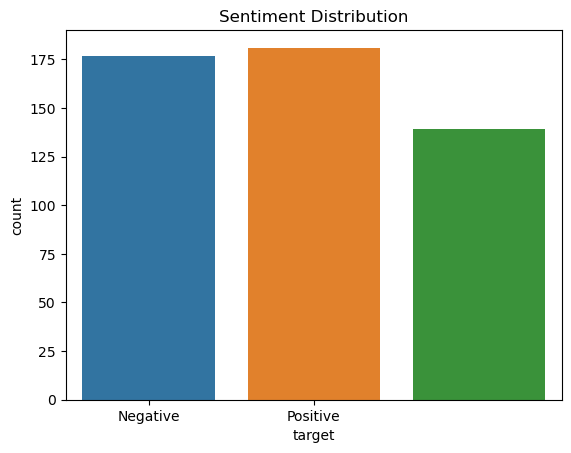

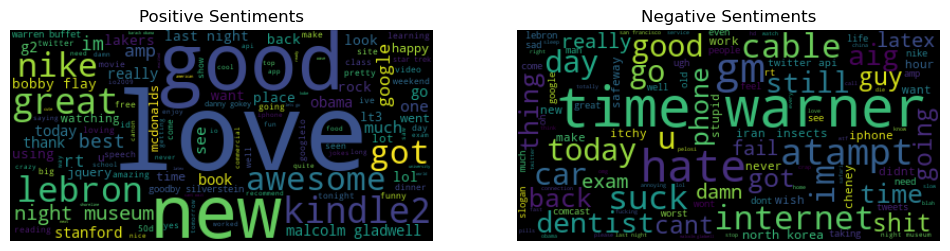

In [4]:
# Check class distribution
sns.countplot(x='target', data=df)
plt.title('Sentiment Distribution')
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.show()

# Example of word cloud (optional)
from wordcloud import WordCloud

# Generate word clouds
positive_words = ' '.join(df[df['target'] == 1]['cleaned_text'])
negative_words = ' '.join(df[df['target'] == 0]['cleaned_text'])

# Plot word clouds
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Positive Sentiments')
plt.imshow(WordCloud(width=400, height=200).generate(positive_words), interpolation='bilinear')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Negative Sentiments')
plt.imshow(WordCloud(width=400, height=200).generate(negative_words), interpolation='bilinear')
plt.axis('off')

plt.show()


In [5]:
# Convert text to numerical data
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['cleaned_text'])

# Define features and target
y = df['target']


In [6]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
# Train the model
model = MultinomialNB()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.65

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.69      0.71        32
           1       0.62      0.87      0.73        38
           2       0.59      0.33      0.43        30

    accuracy                           0.65       100
   macro avg       0.65      0.63      0.62       100
weighted avg       0.65      0.65      0.63       100


Confusion Matrix:
 [[22  7  3]
 [ 1 33  4]
 [ 7 13 10]]


In [8]:
import pickle

# Save the model
with open('sentiment_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

# Save the vectorizer
with open('vectorizer.pkl', 'wb') as vectorizer_file:
    pickle.dump(vectorizer, vectorizer_file)


 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with watchdog (windowsapi)


SystemExit: 1

C:\Users\janan\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py:3534: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
